<a href="https://colab.research.google.com/github/LarissaCastor/Data_Analysis/blob/main/Simula%C3%A7%C3%A3o_Atv_Pratica1l.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import sklearn
from sklearn.datasets import make_blobs

In [18]:
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [19]:
import pandas as pd

In [20]:
X, y = make_blobs(n_samples=500, centers=20, random_state=999)

In [21]:
print(X.shape)

(500, 2)


In [22]:
y

array([16,  9,  2,  0, 12, 15, 12, 14, 14, 17, 19, 19, 19, 11,  2, 12,  9,
       12,  7, 11,  0, 17,  2, 16,  1, 18,  7, 14, 13,  2,  6,  3,  4,  5,
        2, 18,  7, 18, 19, 19, 19, 16,  9, 10, 11, 10,  6, 16,  5, 11, 15,
       16, 12, 16, 12,  0,  3,  8,  2,  9, 12, 13,  7, 15, 18,  4,  4,  2,
        8, 11,  5, 19, 14, 13, 17,  3,  4, 16,  1, 11, 15,  0,  5, 11,  4,
       17,  3, 12, 12, 19, 12,  4, 17, 16, 10, 11, 15, 10,  1, 17, 19,  5,
        2,  8,  8, 13,  8,  1, 11,  1, 18,  2,  8, 12, 15,  0, 14, 15,  5,
        3,  8,  6, 18, 14,  3, 13, 18, 12,  8, 16,  1, 14,  6, 13, 12, 11,
        7, 18, 13,  0,  0, 10, 10,  9,  1,  0,  7, 10,  9,  5,  1,  4,  9,
       11, 18, 15, 14,  4,  5, 11,  4, 16,  6, 18, 14, 14, 10, 17,  7, 10,
        4, 14, 17,  0, 15,  1, 19,  9, 12, 12, 13,  2,  9, 16,  2,  0, 10,
        0,  6, 15, 10,  3,  9, 10, 14,  8,  6,  1,  5,  8,  4, 18,  6,  7,
        9,  5, 19,  6, 15,  9,  6,  9,  6,  0,  4, 18,  5, 18,  3,  7, 12,
        3,  6, 14,  6, 17

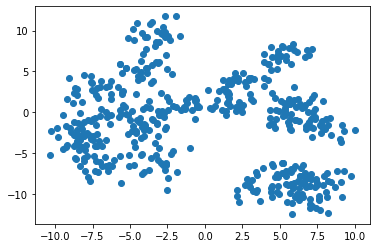

In [23]:
plt.scatter(X[:,0], X[:,1])

In [24]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)                     
    return distances.index(max(distances)) + 1

In [25]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
n = optimal_number_of_clusters(wcss)
print(n)

4


Clusters: 1  / wcss = 31547.372471390485
Clusters: 2  / wcss = 16949.214472147927
Clusters: 3  / wcss = 9464.847250570496
Clusters: 4  / wcss = 6005.101775346179
Clusters: 5  / wcss = 4717.404091931214
Clusters: 6  / wcss = 3662.6403286096665
Clusters: 7  / wcss = 2976.7808744471413
Clusters: 8  / wcss = 2490.8713955724124
Clusters: 9  / wcss = 2062.722658260889
Clusters: 10  / wcss = 1852.4935356253136
Clusters: 11  / wcss = 1694.2762202559363
Clusters: 12  / wcss = 1476.1334004376367
Clusters: 13  / wcss = 1302.4741607478145
Clusters: 14  / wcss = 1160.580495475786
Clusters: 15  / wcss = 1072.9760088255957
Clusters: 16  / wcss = 991.0506200905847
Clusters: 17  / wcss = 923.9564749832449
Clusters: 18  / wcss = 848.9043204434606
Clusters: 19  / wcss = 817.9645576357088
19


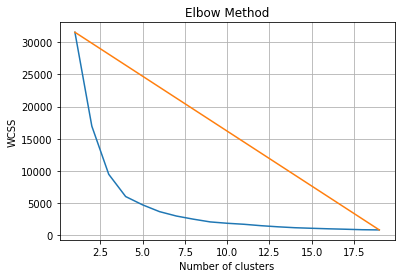

In [26]:
#Escolha do número de cluster - Within Cluster Sum of Squares (WCSS) ou método do cotovelo  
wcss = []    #definição de uma lista vazia que acumulará os valores dos erros quadráticos
for i in range(1, 20):      #criação de um laço de 1 a 20 (19 interações)
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)  #instanciamento do Kmeans (com as interações do laço "i")
    kmeans.fit(X)     #agrupamento com o método fit
    wcss.append(kmeans.inertia_)   #atributo "inertia" => somatório dos erros quadráticos do cluster
    print('Clusters:', i, ' / wcss =', wcss[i-1])

print(len(wcss))
plt.plot(range(1, 20), wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [27]:
#Instanciando o algorítmo K-means com 3 clusters -(DSZ)
kmeans= KMeans(n_clusters=4, init='random')   #random=aleatório 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [28]:
#centroids -(DSZ) 
kmeans.cluster_centers_    #output=> 2 valores dos 4 centroids

array([[-4.18061418,  4.39438299],
       [-6.10635026, -3.5270784 ],
       [ 6.07279058, -8.8012785 ],
       [ 4.6799272 ,  1.81951975]])

In [29]:
#cálculo da distância entre os centroids -(DSZ)
distance = kmeans.fit_transform(X)
distance

array([[14.20030289,  3.38673014, 10.15450129,  4.76597499],
       [ 8.50404636, 11.86190402,  2.24275548, 10.60800915],
       [13.74561955,  0.92302585, 12.94580794,  8.88924608],
       ...,
       [ 0.37092967, 13.27168176, 10.3922334 , 16.53092517],
       [10.01409418, 12.32231688,  0.87651621,  9.99214369],
       [ 7.01187382, 10.88942844,  3.75159909, 10.87565188]])

<function matplotlib.pyplot.show>

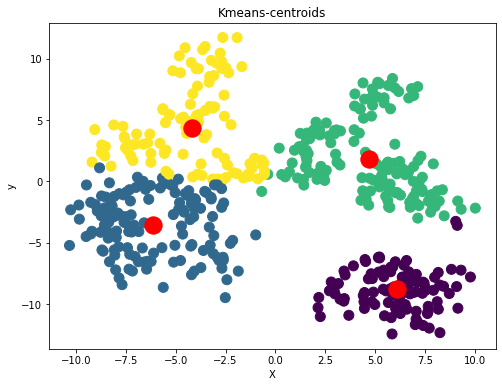

In [30]:
#vizualização dos centroids - (DSZ)
plt.figure(figsize=(8,6))   #determinação tamanho da figura
plt.scatter(X[:,0], X[:,1], s=100, c=kmeans.labels_) #gráfico tipo "scater" com visualização 2D dos atributos de X, c=coloração das labels
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c = 'red', label = 'Centroids') #visualização dos centroids tipo "scater" com visualização 2D dos atributos
plt.title('Kmeans-centroids') 
plt.xlabel('X')
plt.ylabel('y')
plt.show

A figura mostra os dados já em grupos determinados pelas distâncias dos centroids (centroids representados pela cor vermelha)


In [31]:
#Matriz de confusão usando pandas
print(pd.crosstab(y, kmeans.labels_, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0    1    2    3  All
Real                            
0          0    0   25    0   25
1          0    1    0   24   25
2          0   25    0    0   25
3          0    2    4   19   25
4          0    0   25    0   25
5         25    0    0    0   25
6          0   25    0    0   25
7         25    0    0    0   25
8          2    0   23    0   25
9          0    0   25    0   25
10         0    0    0   25   25
11         0   24    0    1   25
12         0   25    0    0   25
13        25    0    0    0   25
14         0    0   23    2   25
15         0    0    0   25   25
16         0   14    0   11   25
17         0   25    0    0   25
18        25    0    0    0   25
19         0    0   25    0   25
All      102  141  150  107  500
